подготовка:

1. загрузить датасет в папку
2. исправить feature_extract.py 

        2.1. line 11: normed -> density

        2.2. line 27: add 'dtype=object'

### Dataset

#### Cloning repo

In [1]:
# From your favorite development directory
!git clone https://github.com/yinguobing/facial-landmark-dataset

fatal: destination path 'facial-landmark-dataset' already exists and is not an empty directory.


In [4]:
cd /content/facial-landmark-dataset

/content/facial-landmark-dataset


#### IBUQ dataset

необходимо загрузить папку с датасетом в файлы

In [5]:
from fmd.ibug import IBUG

# Set the path to the dataset directory.
IBUG_DIR = '/content/ibug'

# Construct a dataset.
ds = IBUG("ibug")

# Populate the dataset with essential data
ds.populate_dataset(IBUG_DIR)

# See what we have got.
print(ds)

name: ibug
authors: Imperial College London
year: 2013
num_marks: 68
num_samples: 135



посмотреть на один случайно

In [6]:
sample = ds.pick_one()
sample.image_file

'/content/ibug/image_094.jpg'

как итерироваться

In [7]:
for sample in ds:
    print(sample.image_file)

/content/ibug/image_033_1.jpg
/content/ibug/image_114_01.jpg
/content/ibug/image_044.jpg
/content/ibug/image_092.jpg
/content/ibug/image_062_1.jpg
/content/ibug/image_101.jpg
/content/ibug/image_047_1.jpg
/content/ibug/image_070.jpg
/content/ibug/image_027.jpg
/content/ibug/image_085.jpg
/content/ibug/image_068_1.jpg
/content/ibug/image_043_1.jpg
/content/ibug/image_105_01.jpg
/content/ibug/image_116.jpg
/content/ibug/image_089_01.jpg
/content/ibug/image_035.jpg
/content/ibug/image_037_1.jpg
/content/ibug/image_102.jpg
/content/ibug/image_050_01.jpg
/content/ibug/image_088.jpg
/content/ibug/image_065_1.jpg
/content/ibug/image_109.jpg
/content/ibug/image_100_03.jpg
/content/ibug/image_110.jpg
/content/ibug/image_089_02.jpg
/content/ibug/image_080_2.jpg
/content/ibug/image_115_01.jpg
/content/ibug/image_089.jpg
/content/ibug/image_020_1.jpg
/content/ibug/image_059.jpg
/content/ibug/image_100_02.jpg
/content/ibug/image_006.jpg
/content/ibug/image_015_1.jpg
/content/ibug/image_029_1.jpg
/c

считать как numpy и посмотреть через opencv

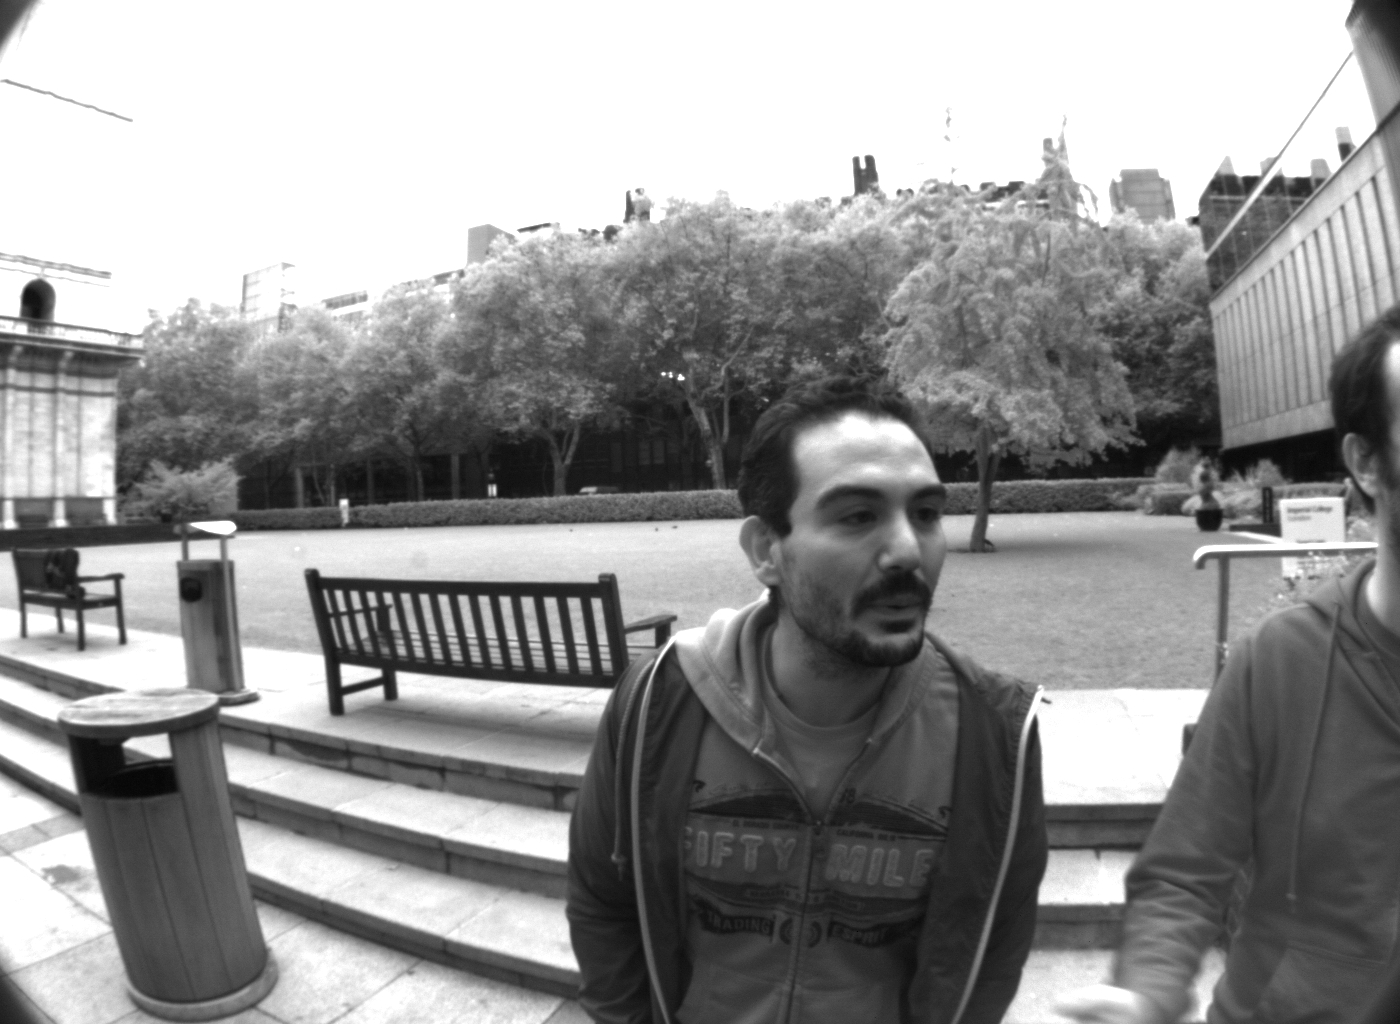

-1

In [8]:
image = sample.read_image()

import cv2
from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2.waitKey()

получить все метки

In [9]:
facial_marks = sample.marks
facial_marks

array([[780.540185, 524.101425,   0.      ],
       [782.067393, 551.210765,   0.      ],
       [783.077485, 577.123497,   0.      ],
       [787.694938, 600.19247 ,   0.      ],
       [795.94974 , 622.191381,   0.      ],
       [815.874341, 638.069771,   0.      ],
       [838.168021, 653.178712,   0.      ],
       [868.61994 , 665.53385 ,   0.      ],
       [895.404526, 665.44974 ,   0.      ],
       [916.309235, 654.784186,   0.      ],
       [923.247485, 637.240351,   0.      ],
       [925.183558, 619.431734,   0.      ],
       [930.99762 , 599.332305,   0.      ],
       [938.320596, 581.66777 ,   0.      ],
       [944.825841, 561.106111,   0.      ],
       [947.326551, 540.766799,   0.      ],
       [941.362561, 523.758376,   0.      ],
       [814.858405, 510.393146,   0.      ],
       [824.808635, 492.626964,   0.      ],
       [845.85158 , 484.672777,   0.      ],
       [869.660017, 486.885322,   0.      ],
       [890.678822, 499.005663,   0.      ],
       [91

получить ключевые метки

In [10]:
key_marks = sample.get_key_marks()
key_marks

array([[844.865628, 521.239372,   0.      ],
       [876.051166, 520.006933,   0.      ],
       [911.794187, 518.804479,   0.      ],
       [935.025538, 516.453696,   0.      ],
       [865.445583, 608.387301,   0.      ],
       [926.169509, 601.773804,   0.      ]])

### LBP

In [2]:
!git clone https://github.com/Elroborn/Face-anti-spoofing-based-on-color-texture-analysis.git

Cloning into 'Face-anti-spoofing-based-on-color-texture-analysis'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 17 (delta 2), reused 17 (delta 2), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [11]:
cd /content/Face-anti-spoofing-based-on-color-texture-analysis

/content/Face-anti-spoofing-based-on-color-texture-analysis


 очистим датасет от файлов с расширением pts

In [18]:
import os
from PIL import Image

for filename in os.listdir('/content/ibug_samples'):
    if filename.endswith('.pts'):
        os.remove('/content/ibug_samples/'+filename)

создадим текстовый документ test_file_list.txt вида:

/content/ibug_samples/image_003_1.jpg 1    

In [35]:
name_list = []
for image in os.listdir('/content/ibug_samples'):
    name_list.append('\n/content/ibug_samples/'+image+' 1')
name_list[0] = name_list[0][1::]

# создадим файлы .txt
with open("/content/Face-anti-spoofing-based-on-color-texture-analysis/test_file_list.txt", "w+") as file:
    for line in name_list:
        file.write(line)

#### получим lbp features

ibug dataset

In [56]:
%%time
!python feature_extract.py

CPU times: user 460 ms, sys: 69.8 ms, total: 530 ms
Wall time: 1min 7s


считаем фичи

In [57]:
import numpy as np
ftr = np.load('/content/Face-anti-spoofing-based-on-color-texture-analysis/test_feature.npy', allow_pickle=True)
ftr.shape, ftr[0].shape

((135,), (178,))